# Notes for 22 September

In [1]:
%matplotlib inline
import numpy as np
import pylab

Our little helper for seeing images.

In [5]:
def show(im):
    '''Display an image with square pixels'''
    pylab.imshow(im, cmap=pylab.gray(), interpolation='none')

We made a simple image.

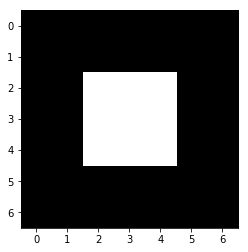

In [9]:
I = np.zeros((7,7), dtype=bool)
I[2:5,2:5] = 1
show(I)

And we recreated our version of scroll left from last time.

In [10]:
def sl(im, amt):
    res = np.zeros_like(im)
    res[:,:-amt] = im[:,amt:]
    return res

Now following the description in the assignment about finding boundaries. It says.

>A pixel, [i,j] is on the right edge of the boundary if and only if I[i,j] is foreground and LI[i,j] is background.

So, we'll compute LI.

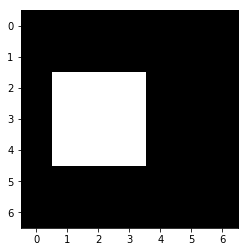

In [11]:
LI = sl(I, 1)
show(LI)

The complement operator (tilde) inverts the image.

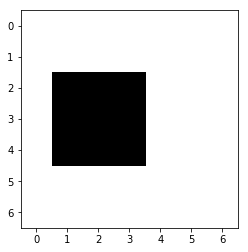

In [12]:
show(~LI)

Here is the original image I **anded** with the **inverse** of LI. The pixels that remain are on the **right boundary** of the object.

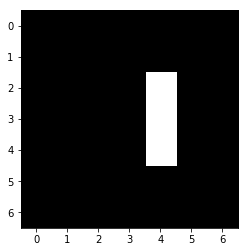

In [13]:
show(I & ~LI)

We can look directly at the underlying arrays.

In [14]:
I

array([[False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False],
       [False, False,  True,  True,  True, False, False],
       [False, False,  True,  True,  True, False, False],
       [False, False,  True,  True,  True, False, False],
       [False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False]], dtype=bool)

In [15]:
LI

array([[False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False],
       [False,  True,  True,  True, False, False, False],
       [False,  True,  True,  True, False, False, False],
       [False,  True,  True,  True, False, False, False],
       [False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False]], dtype=bool)

In [16]:
~LI

array([[ True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True],
       [ True, False, False, False,  True,  True,  True],
       [ True, False, False, False,  True,  True,  True],
       [ True, False, False, False,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True]], dtype=bool)

We thought about the truth table for **and**.

In [17]:
False & False

False

In [18]:
True & False

False

In [19]:
True & True

True

In [20]:
False & True

False

We could define functions (purely for discussion) to mimic the words in the description. `isBackground` is True for background pixels. `isForeground` is True for foreground (white) pixels.

In [21]:
def isBackground(im):
    return ~im

def isForeground(im):
    return im

isForeground(I) & isBackground(LI)

array([[False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False],
       [False, False, False, False,  True, False, False],
       [False, False, False, False,  True, False, False],
       [False, False, False, False,  True, False, False],
       [False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False]], dtype=bool)

You'll write something like this to combine the left, right, top, and bottom boundaries into the total boundary.

In [ ]:
B = LB | RB | TB | BB

Showing how we could use these operators when doing more advanced selection from arrays.

In [22]:
W = np.array([4,5,6])
g = np.array([1,0,1])
W[g == 1]

array([4, 6])

In [23]:
W[(g == 1) & (W > 5)]

array([6])

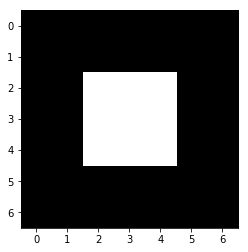

In [24]:
show(I)

We can create a new image J with a bar across the middle.

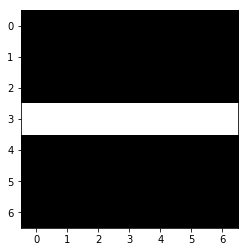

In [25]:
J = np.zeros((7,7), dtype=bool)
J[3,:] = 1
show(J)

image I **logical or'ed** with J combines the two images. Every pixel that is white in **either** is white in the result. Like set union.

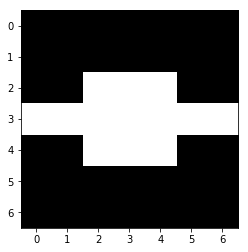

In [26]:
show(I | J)

image I **logical and'ed** with J makes every pixel white that is white in **both** of the images. Like set intersection.

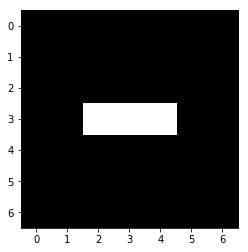

In [27]:
show(I & J)

Logical **and** with the complement of J.

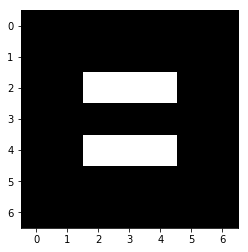

In [28]:
show(I & ~J)

Logical **and** of the complement of I with J.

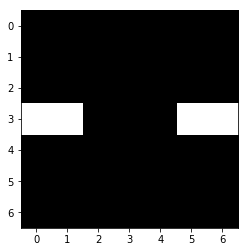

In [29]:
show(~I & J)

In answer to a question we figured out how to get **exclusive or**.

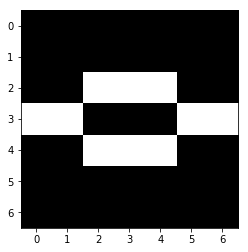

In [30]:
show(I != J)